In [1]:
import lightning as L

from data.datamodule import BlenderDataModule
from model.lightningmodule import MobileR2LLighningModule

In [2]:
data_path = "../../../MobileR2L/model/teacher/ngp_pl/Pseudo/lego"
datamodule = BlenderDataModule(data_path, 4, 16, rand=True)
model = MobileR2LLighningModule(5e-4, 16*3, 10, 256, 16, 3)
trainer = L.Trainer(
    enable_checkpointing=False,
    max_steps=10_000
)

/home/joze/envs/sandbox-venv/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:62: FutureWarning: Importing `PeakSignalNoiseRatio` from `torchmetrics` was deprecated and will be removed in 2.0. Import `PeakSignalNoiseRatio` from `torchmetrics.image` instead.
  _future_warning(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/joze/envs/sandbox-venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


In [3]:
trainer.fit(
    model,
    datamodule,
)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type                  | Params
-----------------------------------------------------
0 | model      | MobileR2L             | 3.2 M 
1 | train_psnr | _PeakSignalNoiseRatio | 0     
2 | val_psnr   | _PeakSignalNoiseRatio | 0     
3 | test_psnr  | _PeakSignalNoiseRatio | 0     
-----------------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.629    Total estimated model params size (MB)


Epoch 1:  37%|███▋      | 739/2000 [08:20<14:13,  1.48it/s, v_num=10, train_loss=0.0465, train_psnr=13.30, val_psnr=9.910] 

/home/joze/envs/sandbox-venv/lib/python3.10/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [7]:
from matplotlib import pyplot as plt
import torch

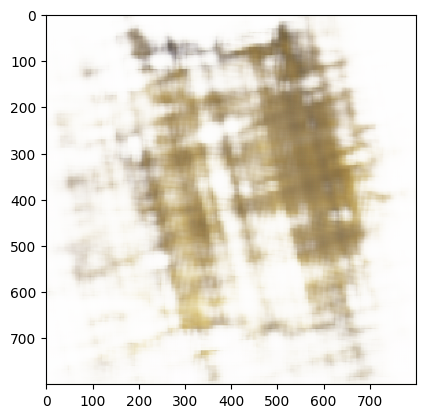

In [14]:
datamodule.setup("test")
rays, img = datamodule.test[3]

with torch.no_grad():
    pred_img = model.model(rays.unsqueeze(0).cuda())

plt.imshow(pred_img.squeeze(0).permute(1, 2, 0).cpu())